##  Stochastic RNA velocity analysis of Forebrain Glut using scRNAvelo

We use a stochastic version of the model for transcriptional dynamics used in velocyto (developed by the Linnarsson lab and Kharchenko Lab).

RNA velocity reference https://www.nature.com/articles/s41586-018-0414-6 <br>

Files needed: hgForebrainGlut.loom (will be downloaded automatically)

In [1]:
import scvelo as scv
import scanpy.api as sc
sc.settings.verbosity=3 # i.e. show errors(0), warnings(1), infos(2) and hints(3)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

scv.logging.print_version()

Running scvelo 0.1.9 on 2018-09-26 23:18.


## Load and cleanup the data

In [2]:
adata = sc.read('data/ForebrainGlut/hgForebrainGlut.loom', cleanup=True, sparse=True, cache=True, 
                backup_url='http://pklab.med.harvard.edu/velocyto/hgForebrainGlut/hgForebrainGlut.loom')
adata.var_names_make_unique()

... reading from cache file ./cache/data-ForebrainGlut-hgForebrainGlut.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
sc.logging.print_memory_usage()

scv.pp.show_proportions(adata)
scv.pp.cleanup(adata, clean='all')

adata

Memory usage: current 0.35 GB, difference +0.35 GB
abundance of ['spliced', 'unspliced', 'ambiguous']: [0.66 0.27 0.07]


AnnData object with n_obs × n_vars = 1720 × 32738 
    layers: 'spliced', 'unspliced'

## Preprocess the data

In [4]:
scv.pp.filter_and_normalize(adata)

filtered out 20488 genes that are detected in less than 10 counts
If you pass `n_top_genes`, all cutoffs are ignored.


In [5]:
scv.pp.moments(adata)

computing neighbors


/Users/volker.bergen/anaconda3/envs/testenv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


    finished (0:00:03.29) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments
    finished (0:00:00.52) --> added to `.layers`
    'Ms', moments of spliced abundances
    'Mu', moments of unspliced abundances


## Compute velocity and velocity graph

In [6]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:02.18) --> added to `.layers`
    'velocity', velocity vectors for each individual cell
--> added to `.obs`
    velocity_confidence


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:01.49) --> added to `.uns`
    'velocity_graph', sparse matrix with cosine correlations


## Project the velocity graph onto an embedding

In [8]:
sc.tl.louvain(adata, resolution=.7, random_state=4)
scv.tl.velocity_embedding(adata, basis='pca')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.25) --> found 6 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
computing velocity embedding
    finished (0:00:00.27) --> added to `.obsm`
    'velocity_pca', embedded velocity vectors


<Figure size 432x288 with 0 Axes>

## Cluster and annotate the data

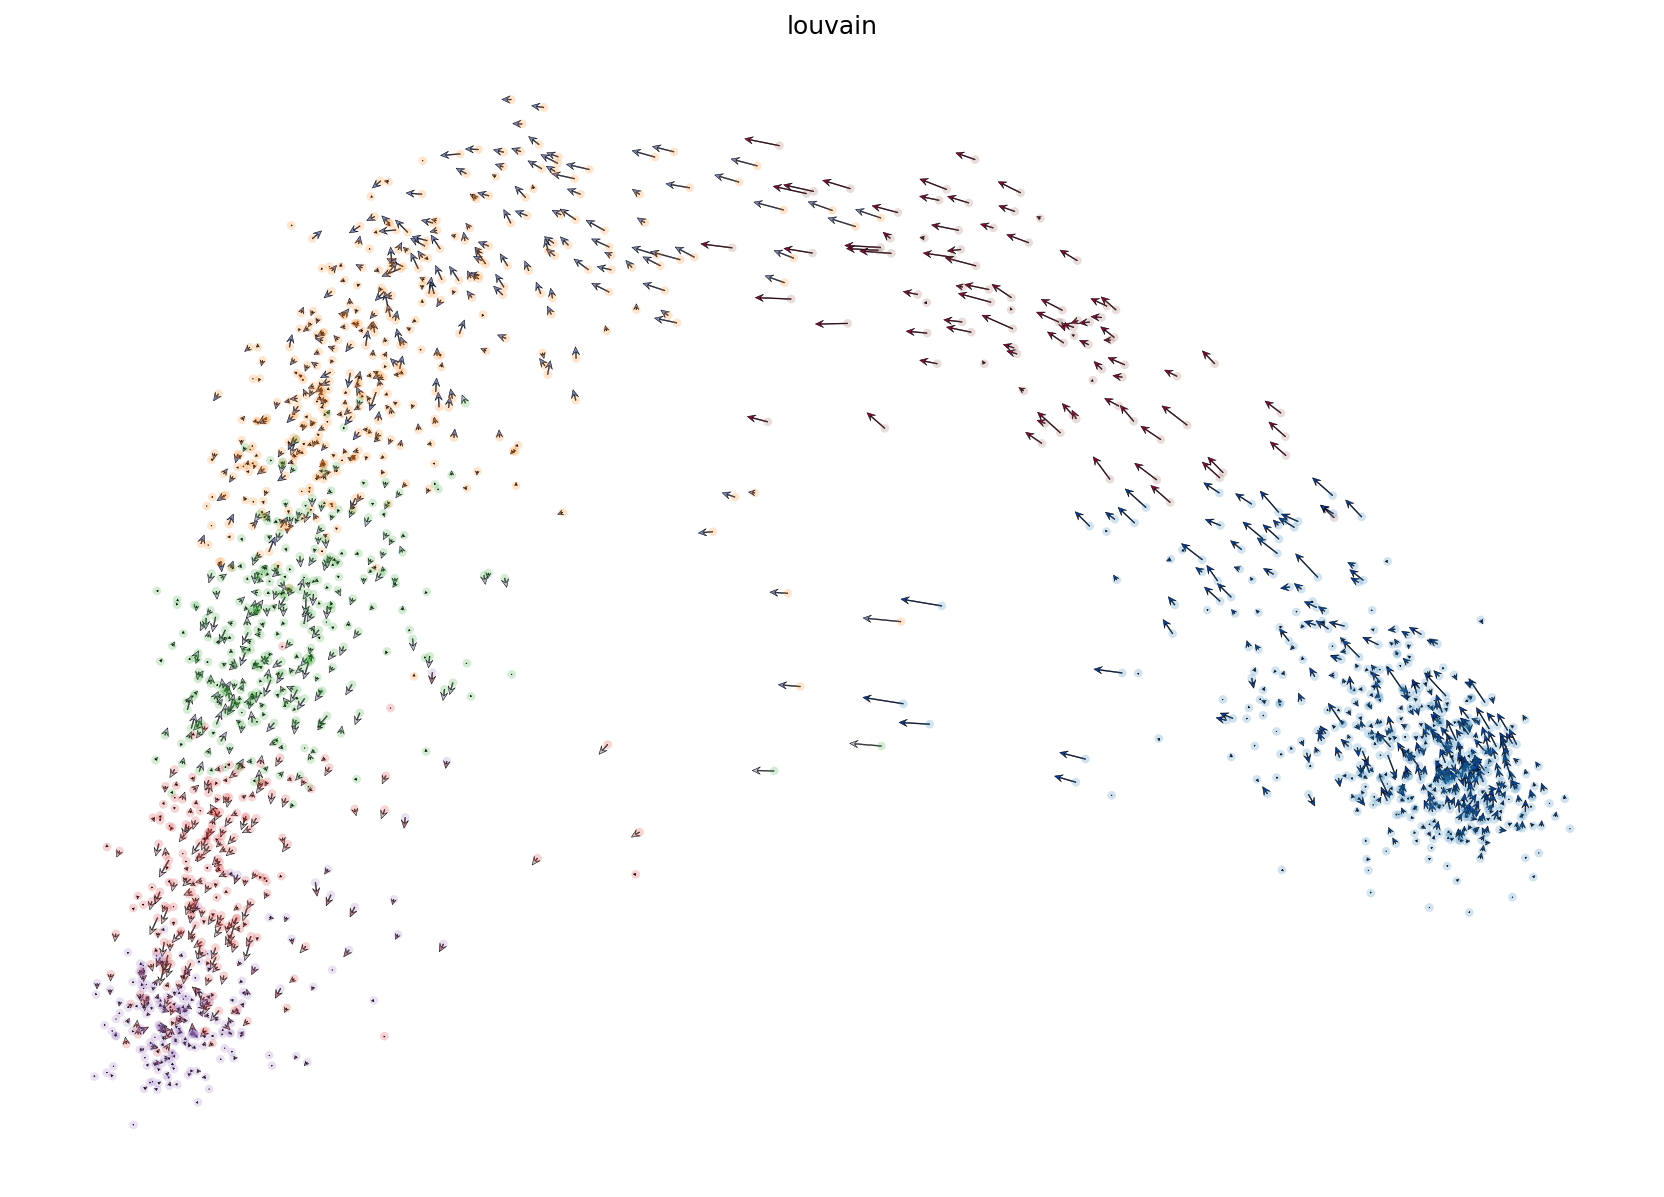

In [9]:
scv.pl.velocity_embedding(adata, basis='pca')

In [10]:
scv.tl.terminal_states(adata, self_transitions=True)

computing root cells using 7 eigenvectors with eigenvalue 1.
computing end points using 1 eigenvectors with eigenvalue 1.
    finished (0:00:00.22) --> added to `.obs`
    'root', root cells of Markov diffusion process
    'end', end points of Markov diffusion process


<Figure size 432x288 with 0 Axes>

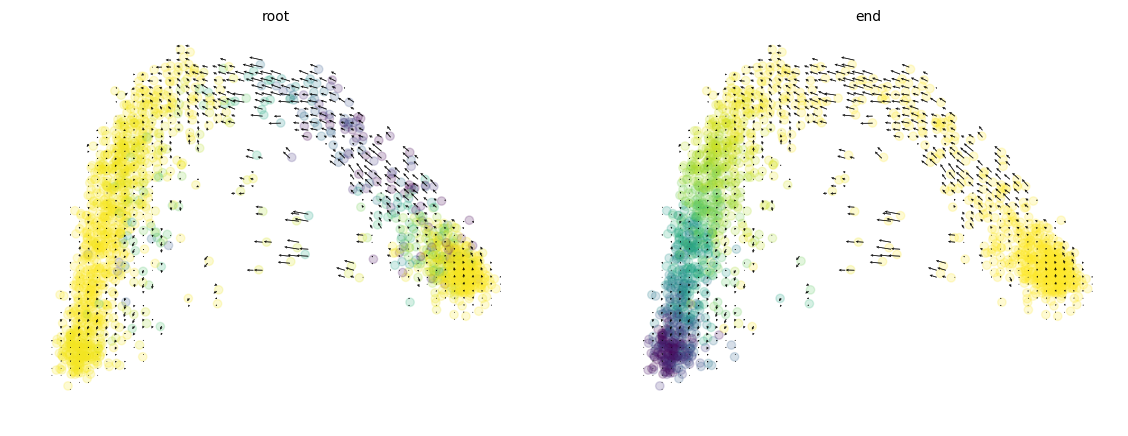

In [17]:
scv.pl.velocity_embedding_grid(adata, basis='pca', color=['root', 'end'])

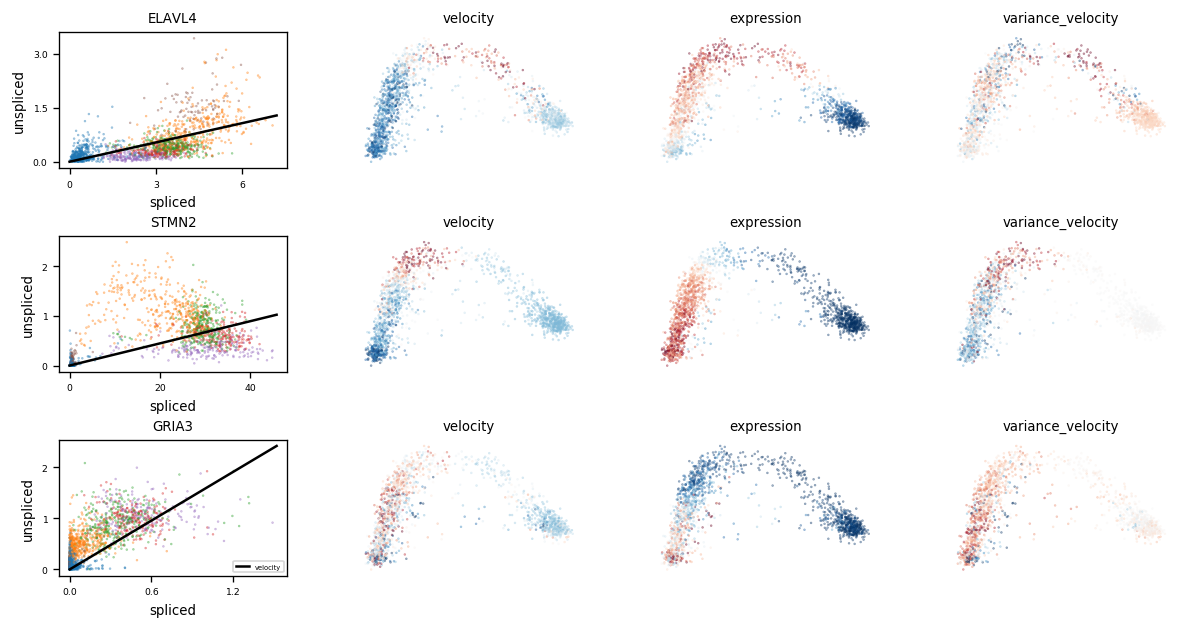

In [12]:
scv.pl.velocity(adata, basis='pca', var_names=["ELAVL4", "STMN2", "GRIA3"])

In [13]:
adata.uns['velocyto_transitions'] = adata.uns['velocity_graph']
sc.tl.paga(adata)
sc.tl.paga(adata, use_rna_velocity=True)

running partition-based graph abstraction (PAGA)
    finished (0:00:00.07) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
running partition-based graph abstraction (PAGA)
    finished (0:00:00.23) --> added
    'paga/transitions_confidence', connectivities adjacency (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


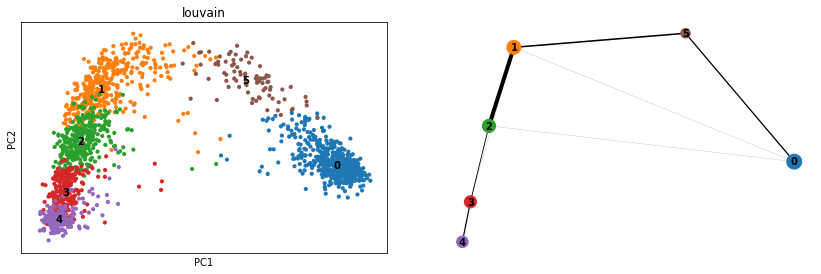

In [14]:
sc.pl.paga_compare(adata, basis='pca', edges=True, solid_edges='transitions_confidence')